# Lab 2 Sample Code

In [62]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(98)

@staticmethod
def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))

@staticmethod
def sigmoid_derivative(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)




In [ ]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, gradients):
        """
        使用梯度更新參數。

        參數:
            gradients (dict): 一個字典，其鍵是參數名，值是相應的梯度。
                             例如: {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}

        返回:
            updates (dict): 一個字典，其鍵是參數名，值是使用 SGD 更新後的參數。
                            例如: {'W1': new_W1, 'b1': new_b1, 'W2': new_W2, 'b2': new_b2}
        """
        updates = {}
        for param, gradient in gradients.items():
            updates[param] = -self.learning_rate * gradient
        return updates

In [57]:
import numpy as np
import matplotlib.pyplot as plt


class ReduceLROnPlateau:
    def __init__(self, model, patience=10, factor=0.1, min_lr=1e-6):
        """
        :param model: The neural network model instance which has a 'learning_rate' attribute.
        :param patience: Number of epochs with no improvement to wait before reducing the learning rate.
        :param factor: Factor by which the learning rate will be reduced. New_lr = lr * factor.
        :param min_lr: Minimum learning rate. The learning rate will not be reduced beyond this value.
        """
        self.model = model
        self.patience = patience
        self.factor = factor
        self.min_lr = min_lr
        self.best_loss = float('inf')
        self.wait = 0  # Current number of epochs without improvement.

    def step(self, current_loss):
        """
        Call this method after each epoch. If the current loss is less than the best loss,
        it will set the best loss to the current loss and reset the 'wait' counter. 
        If there is no improvement, it will increase the 'wait' counter. If 'wait' 
        becomes greater than 'patience', it will reduce the learning rate.
        """
        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait > self.patience:
                self.reduce_lr()

    def reduce_lr(self):
        """
        Reduce the learning rate by the factor specified. If the new learning rate is 
        below the minimum learning rate specified, set it to the minimum learning rate.
        """
        new_lr = self.model.learning_rate * self.factor
        if new_lr < self.min_lr:
            new_lr = self.min_lr
        print(f"Reducing learning rate from {self.model.learning_rate} to {new_lr}.")
        self.model.learning_rate = new_lr
        self.wait = 0

class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=1e-3):
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
        
        self.loss_history = []
        self.test_loss_history = []
        self.acc_history = []
        
        self.hidden1_weights = np.random.randn(2, 100)
        self.hidden1_biases = np.zeros((1, 100))
        self.hidden2_weights = np.random.randn(100, 50)
        self.hidden2_biases = np.zeros((1, 50))
        self.hidden3_weights = np.random.randn(50, 10)
        self.hidden3_biases = np.zeros((1, 10))
        self.output_weights = np.random.randn(10, 1)
        self.output_biases = np.zeros((1, 1))

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"
        plt.figure(figsize=(11, 5))
        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)
        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)
        plt.show()

    def forward(self, inputs):
        self.z1 = np.dot(inputs, self.hidden1_weights) + self.hidden1_biases
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.hidden2_weights) + self.hidden2_biases
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.hidden3_weights) + self.hidden3_biases
        self.a3 = sigmoid(self.z3)
        self.z_out = np.dot(self.a3, self.output_weights) + self.output_biases
        self.a_out = sigmoid(self.z_out)
        return self.a_out

    def mse_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def mse_loss_derivative(self, y_true, y_pred):
        return -2 * (y_true - y_pred)

    def backward(self, inputs, y_true):
        dz_out = self.a_out - y_true
        dw_out = np.dot(self.a3.T, dz_out)
        db_out = np.sum(dz_out, axis=0, keepdims=True)
        dz3 = np.dot(dz_out, self.output_weights.T) * sigmoid_derivative(self.a3)
        dw3 = np.dot(self.a2.T, dz3)
        db3 = np.sum(dz3, axis=0, keepdims=True)
        dz2 = np.dot(dz3, self.hidden3_weights.T) * sigmoid_derivative(self.a2)
        dw2 = np.dot(self.a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, self.hidden2_weights.T) * sigmoid_derivative(self.a1)
        dw1 = np.dot(inputs.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        self.output_weights -= self.learning_rate * dw_out
        self.output_biases -= self.learning_rate * db_out
        self.hidden3_weights -= self.learning_rate * dw3
        self.hidden3_biases -= self.learning_rate * db3
        self.hidden2_weights -= self.learning_rate * dw2
        self.hidden2_biases -= self.learning_rate * db2
        self.hidden1_weights -= self.learning_rate * dw1
        self.hidden1_biases -= self.learning_rate * db1

    @staticmethod
    def plot_training_progress(losses, accuracies):
        epochs = range(len(losses))
        
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs, losses,"#FFD662")
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(1, 2, 2)
        plt.plot(epochs, accuracies,'#00539C')
        plt.title('Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')

        plt.show()


    def evaluate(self, test_inputs, test_labels):
        # Assuming this method is defined elsewhere
        n = test_inputs.shape[0]
        total_loss = 0.0
        correct_predictions = 0

        for idx in range(n):
            output = self.forward(test_inputs[idx : idx + 1, :])
            loss = self.mse_loss(test_labels[idx : idx + 1, :], output)
            total_loss += loss

            # For binary classification, you can threshold the output at 0.5
            predicted_label = (output > 0.5).astype(int)
            if predicted_label == test_labels[idx]:
                correct_predictions += 1

        avg_loss = total_loss / n
        accuracy = 100.0 * correct_predictions / n

        return 


    def train(self, inputs, labels):
        scheduler = ReduceLROnPlateau(self)
        """The training routine that runs and updates the model.
        
        Args: 
            inputs: the training data.
            labels: the ground truth corresponding to the input data.
        """
        assert inputs.shape[0] == labels.shape[0]  # Ensure the number of samples matches the number of labels

        self.loss_history = []  # List to store average loss for each epoch
        self.acc_history = []   # List to store accuracy for each epoch

        for epoch in range(self.num_step):
            total_loss = 0.0
            correct_predictions = 0
            
            for idx in range(inputs.shape[0]):
                # 1. Forward pass
                self.output = self.forward(inputs[idx : idx + 1, :])

                # 2. Compute loss
                loss = self.mse_loss(labels[idx : idx + 1, :], self.output)
                total_loss += loss
                
                # 3. Backward pass
                self.backward(inputs[idx : idx + 1, :], labels[idx : idx + 1, :])
                
                # Track correct predictions
                if np.round(self.output) == labels[idx]:
                    correct_predictions += 1
            
            avg_loss = total_loss / inputs.shape[0]
            accuracy = float(correct_predictions) / float(inputs.shape[0])            # Save to history
            self.loss_history.append(avg_loss)
            self.acc_history.append(accuracy)

            if epoch % self.print_interval == 0:
                print(f"Epoch {epoch}/{self.num_step} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

        print("Training finished")
        self.test(inputs,labels)

    def test(self, inputs, labels):
        n = inputs.shape[0]
        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])
        error /= n
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")
        #self.plot_loss_and_accuracy(self.loss_history, self.acc_history, self.test_loss_history, self.acc_history)

    def plot_avg_loss_and_accuracy(loss_history, acc_history, test_loss_history=None, test_acc_history=None):
        epochs = range(len(loss_history))
        
        plt.figure(figsize=(12, 5))
        
        # Plot average loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss_history, '-o', label='Training Loss', color='blue')
        if test_loss_history:
            plt.plot(epochs, test_loss_history, '-o', label='Test Loss', color='red')
        plt.title('Training and Test Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, acc_history, '-o', label='Training Accuracy', color='blue')
        if test_acc_history:
            plt.plot(epochs, test_acc_history, '-o', label='Test Accuracy', color='red')
        plt.title('Training and Test Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

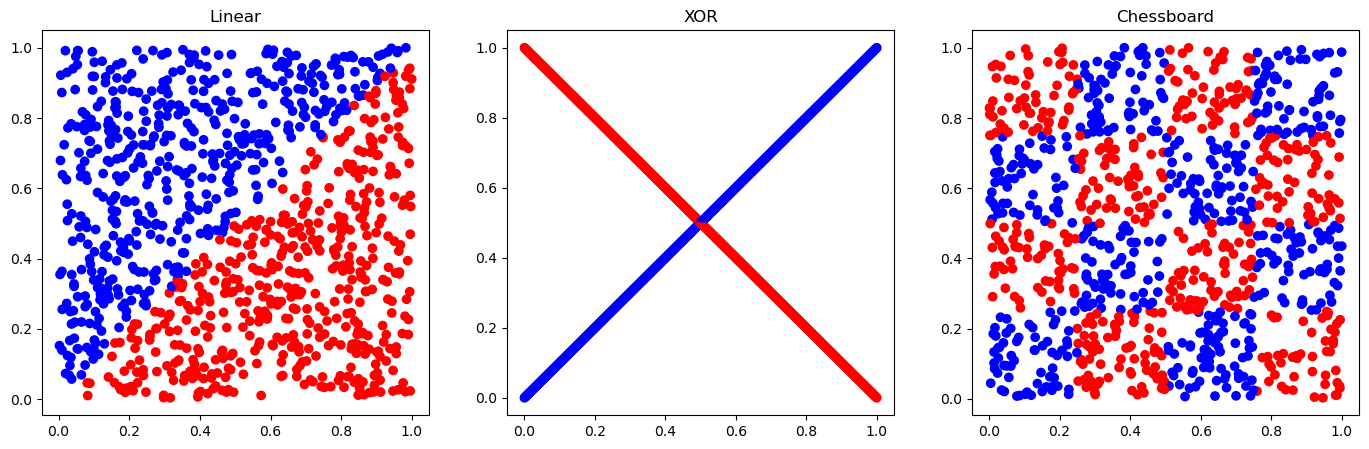

In [58]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epoch 0/1000 - Loss: 0.2534, Accuracy: 0.5120
Epoch 100/1000 - Loss: 0.0261, Accuracy: 0.9900
Epoch 200/1000 - Loss: 0.0129, Accuracy: 0.9960
Epoch 300/1000 - Loss: 0.0094, Accuracy: 0.9960
Epoch 400/1000 - Loss: 0.0076, Accuracy: 0.9960
Epoch 500/1000 - Loss: 0.0065, Accuracy: 0.9980
Epoch 600/1000 - Loss: 0.0058, Accuracy: 0.9980
Epoch 700/1000 - Loss: 0.0052, Accuracy: 0.9980
Epoch 800/1000 - Loss: 0.0047, Accuracy: 0.9980
Epoch 900/1000 - Loss: 0.0044, Accuracy: 0.9980
Training finished
accuracy: 98.29%


/var/folders/fz/lj9jw3dj019b4wzrs_sm61kr0000gn/T/ipykernel_45811/3374976.py:210: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("accuracy: %.2f" % ((1 - error) * 100) + "%")


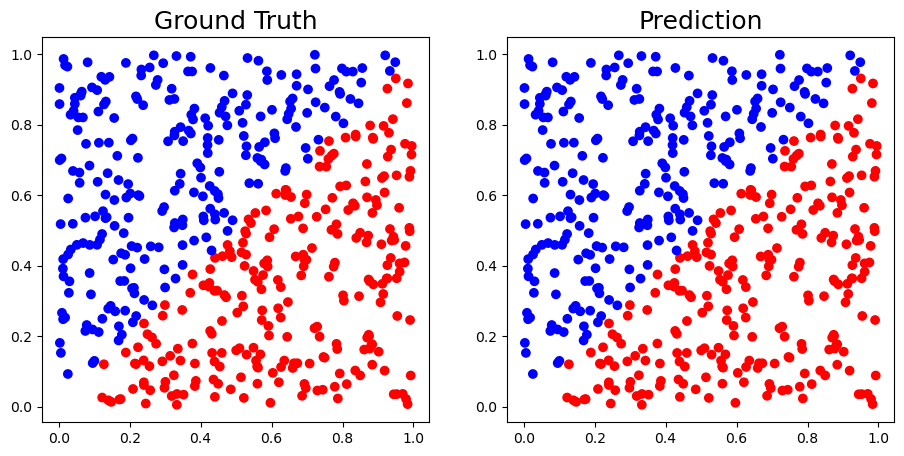

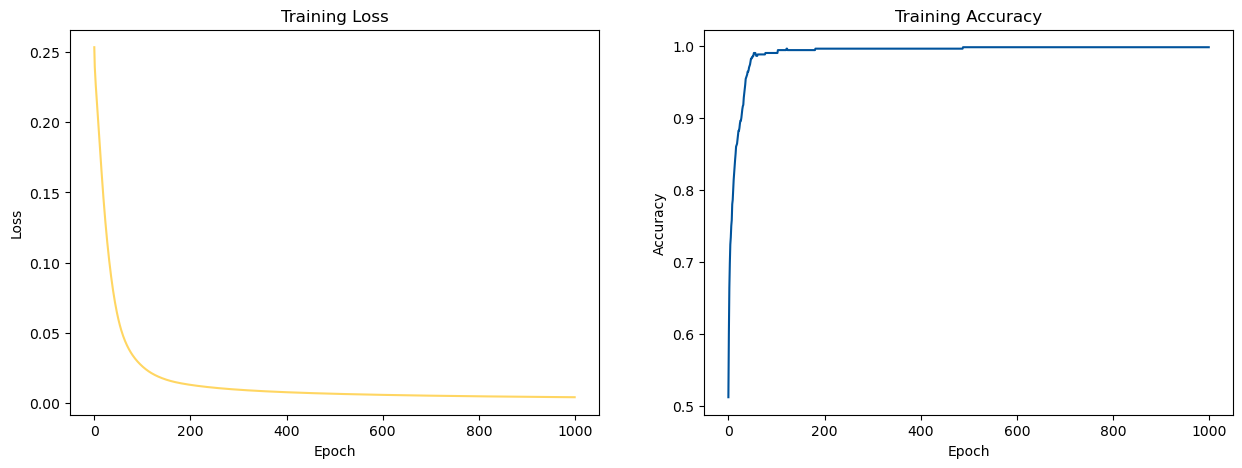

In [59]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)

net = SimpleNet(1000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)
SimpleNet.plot_training_progress(net.loss_history, net.acc_history)

### Run "XOR"

Epoch 0/2000 - Loss: 0.2910, Accuracy: 0.5000
Epoch 100/2000 - Loss: 0.1577, Accuracy: 0.9280
Epoch 200/2000 - Loss: 0.0765, Accuracy: 0.9760
Epoch 300/2000 - Loss: 0.0456, Accuracy: 0.9720
Epoch 400/2000 - Loss: 0.0337, Accuracy: 0.9760
Epoch 500/2000 - Loss: 0.0277, Accuracy: 0.9780
Epoch 600/2000 - Loss: 0.0240, Accuracy: 0.9800
Epoch 700/2000 - Loss: 0.0214, Accuracy: 0.9820
Epoch 800/2000 - Loss: 0.0195, Accuracy: 0.9820
Epoch 900/2000 - Loss: 0.0180, Accuracy: 0.9840
Epoch 1000/2000 - Loss: 0.0167, Accuracy: 0.9840
Epoch 1100/2000 - Loss: 0.0157, Accuracy: 0.9860
Epoch 1200/2000 - Loss: 0.0148, Accuracy: 0.9860
Epoch 1300/2000 - Loss: 0.0140, Accuracy: 0.9860
Epoch 1400/2000 - Loss: 0.0134, Accuracy: 0.9860
Epoch 1500/2000 - Loss: 0.0128, Accuracy: 0.9880
Epoch 1600/2000 - Loss: 0.0122, Accuracy: 0.9880
Epoch 1700/2000 - Loss: 0.0118, Accuracy: 0.9880
Epoch 1800/2000 - Loss: 0.0113, Accuracy: 0.9880
Epoch 1900/2000 - Loss: 0.0109, Accuracy: 0.9880
Training finished
accuracy: 96.8

/var/folders/fz/lj9jw3dj019b4wzrs_sm61kr0000gn/T/ipykernel_45811/3374976.py:210: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("accuracy: %.2f" % ((1 - error) * 100) + "%")


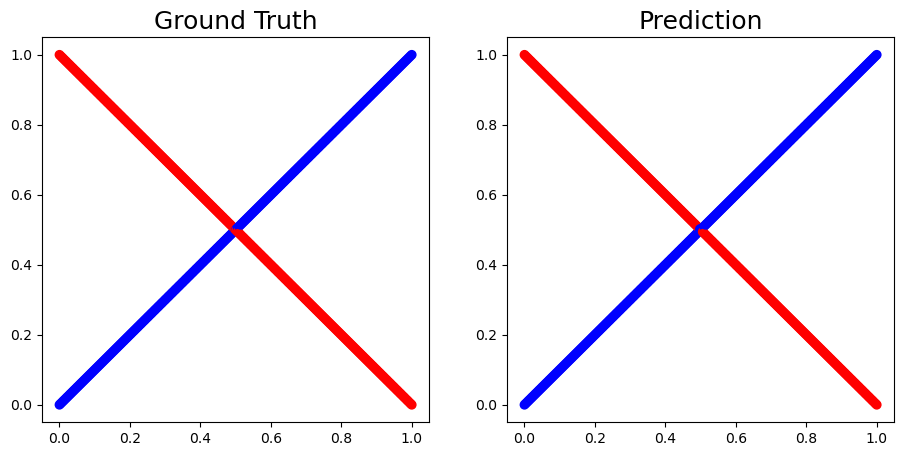

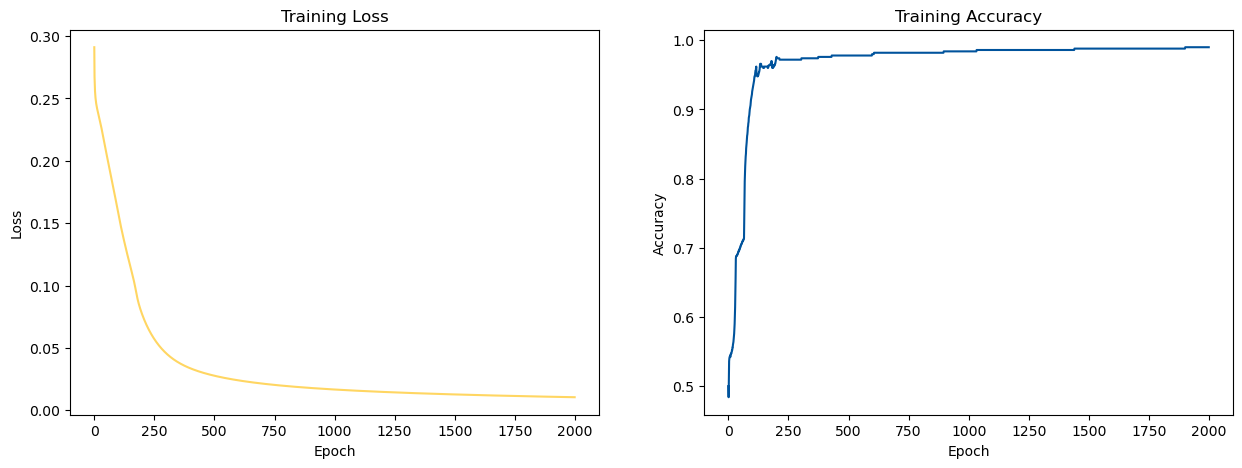

In [61]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(2000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)
SimpleNet.plot_training_progress(net.loss_history, net.acc_history)

### Run "Chessboard"

Epoch 0/6000 - Loss: 0.2544, Accuracy: 0.5350
Epoch 100/6000 - Loss: 0.2473, Accuracy: 0.5360
Epoch 200/6000 - Loss: 0.2454, Accuracy: 0.5480
Epoch 300/6000 - Loss: 0.2432, Accuracy: 0.5520
Epoch 400/6000 - Loss: 0.2410, Accuracy: 0.5510
Epoch 500/6000 - Loss: 0.2390, Accuracy: 0.5320
Epoch 600/6000 - Loss: 0.2372, Accuracy: 0.5230
Epoch 700/6000 - Loss: 0.2353, Accuracy: 0.5250
Epoch 800/6000 - Loss: 0.2333, Accuracy: 0.5350
Epoch 900/6000 - Loss: 0.2313, Accuracy: 0.5450
Epoch 1000/6000 - Loss: 0.2287, Accuracy: 0.5580
Epoch 1100/6000 - Loss: 0.2253, Accuracy: 0.5790
Epoch 1200/6000 - Loss: 0.2201, Accuracy: 0.6050
Epoch 1300/6000 - Loss: 0.2140, Accuracy: 0.6150
Epoch 1400/6000 - Loss: 0.2088, Accuracy: 0.6240
Epoch 1500/6000 - Loss: 0.2043, Accuracy: 0.6310
Epoch 1600/6000 - Loss: 0.2005, Accuracy: 0.6350
Epoch 1700/6000 - Loss: 0.1972, Accuracy: 0.6420
Epoch 1800/6000 - Loss: 0.1942, Accuracy: 0.6550
Epoch 1900/6000 - Loss: 0.1907, Accuracy: 0.6630
Epoch 2000/6000 - Loss: 0.1864, 

/var/folders/fz/lj9jw3dj019b4wzrs_sm61kr0000gn/T/ipykernel_45811/3374976.py:210: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("accuracy: %.2f" % ((1 - error) * 100) + "%")


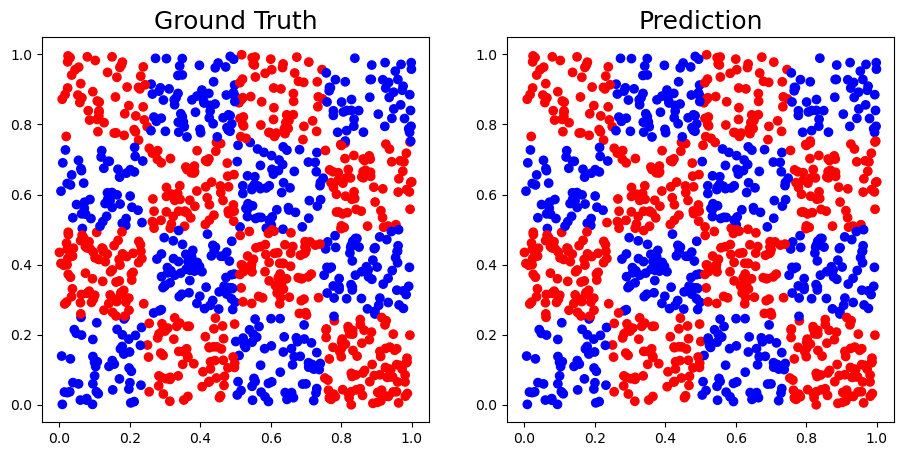

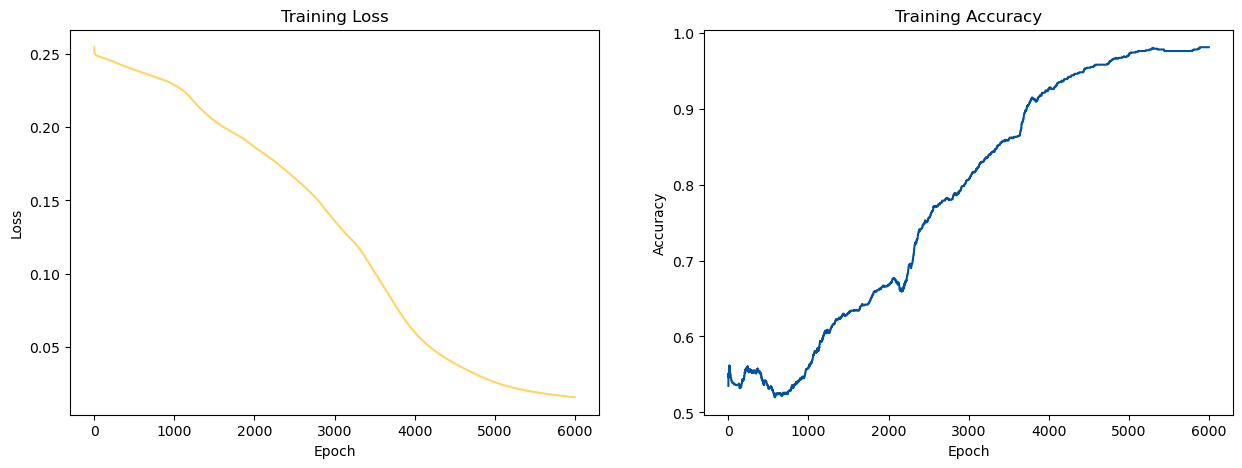

In [63]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(6000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)
SimpleNet.plot_training_progress(net.loss_history, net.acc_history)